# 6.5: Unsupervised Machine Learning: Clustering
### This script contains the following:

#### 1. Importing libraries and data 
#### 2. Data Cleaning
#### 3. The elbow technique
#### 4. K-Means Clustering
#### 5. Conclusion from the Clusters

## 01. Import Libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
import pylab as pl
import os

In [2]:
%matplotlib inline

In [3]:
# define path
path = r'/Users/sudip/Desktop/DATA ANALYST/Projects/Project 6/Data'

In [4]:
# import data
df = pd.read_csv(os.path.join(path, 'prepared_data', 'airbnb_berlin_cleaned_4.csv'), index_col = False)

In [5]:
df.shape

(12600, 20)

In [6]:
df.head()

,Unnamed: 0,id,name,host_id,district,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_total_listings,availability_365,num_reviews_ltm,price_category,dist_from_center,review_scores_cleanliness
0,0,39971294,Cozy flat with chimney,21565256,Friedrichshain-Kreuzberg,nördliche Luisenstadt,52.50168,13.41573,Entire home/apt,50,1,2,2019-12-02,0.06,1,0,0,medium_price,2.335410,5.00
1,1,11934470,Bright Studio Apartment / 4th fl/ long term,62819516,Neukölln,Reuterstraße,52.49226,13.42937,Entire home/apt,43,30,5,2022-03-29,0.07,2,271,3,medium_price,4.061674,4.80
2,2,17580693,"Gemütliches, Zentrales Zimmer mit Blick ins Grüne",119416956,Mitte,Parkviertel,52.56151,13.35515,Private room,42,2,31,2022-03-07,0.50,1,10,4,medium_price,7.135688,4.58
3,3,17497917,BERLIN MITTE - hotspot - central & calm,5937313,Mitte,Alexanderplatz,52.52438,13.41012,Entire home/apt,106,2,116,2022-05-29,1.84,1,6,25,high_price,0.741165,4.95
4,4,9924899,"Charming room in Kreuzberg, Graefekiez",4289187,Friedrichshain-Kreuzberg,Tempelhofer Vorstadt,52.49087,13.41712,Private room,39,3,7,2019-09-20,0.09,2,0,0,medium_price,3.470585,4.86


## 02. Data Cleaning

##### Missing Values

In [7]:
# check for mission values
df.isnull().sum() # no missing values

Unnamed: 0                   0
id                           0
name                         0
host_id                      0
district                     0
neighbourhood                0
latitude                     0
longitude                    0
room_type                    0
price                        0
minimum_nights               0
number_of_reviews            0
last_review                  0
reviews_per_month            0
host_total_listings          0
availability_365             0
num_reviews_ltm              0
price_category               0
dist_from_center             0
review_scores_cleanliness    0
dtype: int64

##### Duplicates

In [8]:
# check for duplicates
dups = df.duplicated()
dups.shape # No dups

(12600,)

In [9]:
df.columns

Index(['Unnamed: 0', 'id', 'name', 'host_id', 'district', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'host_total_listings', 'availability_365', 'num_reviews_ltm',
       'price_category', 'dist_from_center', 'review_scores_cleanliness'],
      dtype='object')

In [10]:
#Removing categorical variables from the data as they are irrelevant for analysis.
df_sub = df.drop([
    "Unnamed: 0", 
    "id", 
    "name", 
    "host_id", 
    "district", 
    "neighbourhood", 
    "latitude", 
    "longitude", 
    'room_type',
    'last_review',
    'price_category'
], axis= 1)

In [11]:
df_sub.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,host_total_listings,availability_365,num_reviews_ltm,dist_from_center,review_scores_cleanliness
0,50,1,2,0.06,1,0,0,2.335410,5.00
1,43,30,5,0.07,2,271,3,4.061674,4.80
2,42,2,31,0.50,1,10,4,7.135688,4.58
3,106,2,116,1.84,1,6,25,0.741165,4.95
4,39,3,7,0.09,2,0,0,3.470585,4.86


## 03. The Elbow Techniques

In [12]:
# define the range of potential clusters in the data
num_c1 = range(1,10)

In [13]:
# define k-means cluster in the range we assigned above
kmeans = [KMeans(n_clusters = i) for i in num_c1]

In [14]:
# Creates a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df_sub).score(df_sub) for i in range(len(kmeans))]
score

[-233779979.33904225,
 -92978185.66351159,
 -73946030.22988684,
 -60396400.41063293,
 -50733975.25968213,
 -44248535.950015225,
 -38307571.201402195,
 -35084405.45413551,
 -32827913.371158145]

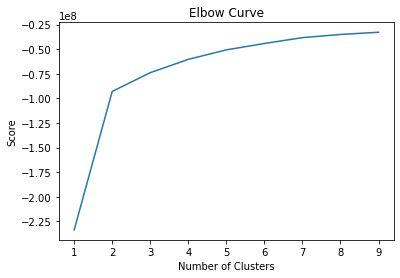

In [15]:
# Plot the elbow curve using PyLab.
pl.plot(num_c1, score)
pl.title('Elbow Curve')
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.show()

#####  In this curve, the optimal count for the clusters is three as after that, the curve straightens out.

## 04. K-Means Clustering

In [16]:
# create a k-means object
kmeans = KMeans(n_clusters = 3, n_jobs = -1)

In [17]:
# fit the k-means object to the data
kmeans.fit(df_sub)
df_sub['clusters'] = kmeans.fit_predict(df_sub)
df_sub.head()

/Users/sudip/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/sudip/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


,price,minimum_nights,number_of_reviews,reviews_per_month,host_total_listings,availability_365,num_reviews_ltm,dist_from_center,review_scores_cleanliness,clusters
0,50,1,2,0.06,1,0,0,2.335410,5.00,2
1,43,30,5,0.07,2,271,3,4.061674,4.80,0
2,42,2,31,0.50,1,10,4,7.135688,4.58,2
3,106,2,116,1.84,1,6,25,0.741165,4.95,2
4,39,3,7,0.09,2,0,0,3.470585,4.86,2


In [18]:
df_sub['clusters'].value_counts()

2    8937
0    2986
1     677
Name: clusters, dtype: int64

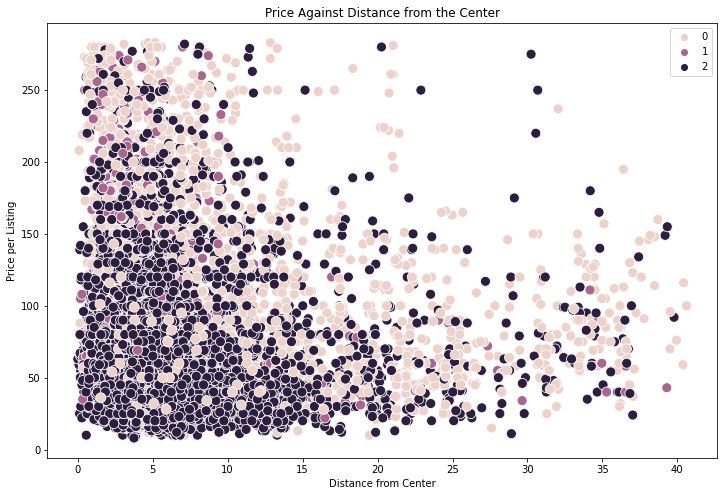

In [19]:
# Plot the clusters for the "Price per Listing" and "dist_from_center" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['dist_from_center'], y=df_sub['price'], hue=kmeans.labels_, s=100) 
# Here, we're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Distance from Center') # Label x-axis.
plt.ylabel('Price per Listing') # Label y-axis.
plt.title('Price Against Distance from the Center')
plt.show()

From the above graph, we can see that there are a lot of variations with in the clusters. 
we can see that most of the listings in Airbnb are with in 10 km from the center of berlin. Further, the most of the listings with in 10 km have price range upto 150. It also shows that, maximum expensive Listings in Airbnb are  with in 10km with few outliers. There are no listings with price above 200 within the distance of 35 and 40 km. 

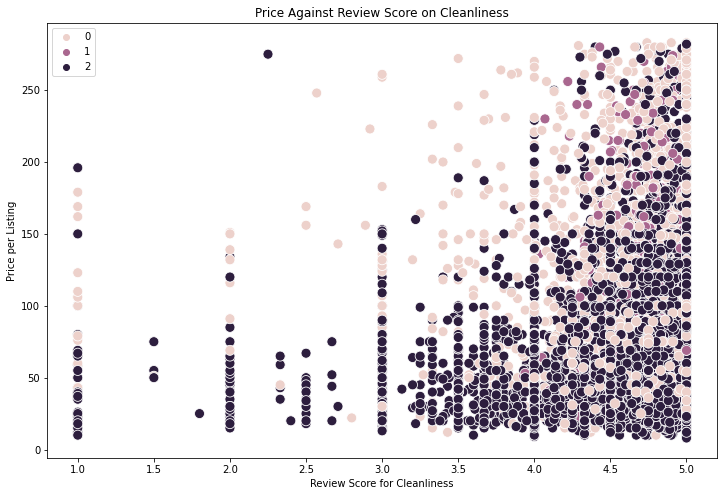

In [20]:
# Plot the clusters for the "Price per Listing" and "review_scores_cleanliness" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['review_scores_cleanliness'], y=df_sub['price'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Review Score for Cleanliness') # Label x-axis.
plt.ylabel('Price per Listing') # Label y-axis.
plt.title('Price Against Review Score on Cleanliness')
plt.show()

From the above graph, we can see that most of the listings in Airbnb have review score for cleanliness above 3.5. Listings within cluster 1 donot have review score less than 3.5 and are in high range price. It also shows that, expensive Listings in Airbnb donot have review score less than 2. However, the review score for the cleanliness is not affecting the price of the Listings as we can see various range of price for review score above 4.5.

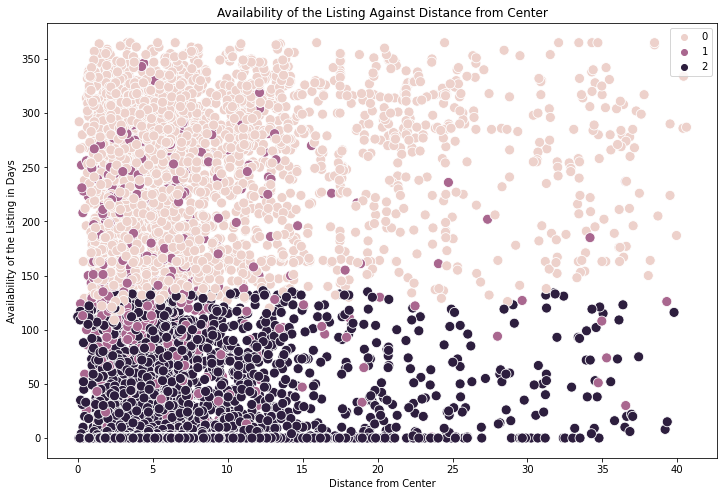

In [21]:
# Plot the clusters for the "availability_365" and "dist_from_center" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['dist_from_center'], y=df_sub['availability_365'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Distance from Center') # Label x-axis.
plt.ylabel('Availability of the Listing in Days') # Label y-axis.
plt.title('Availability of the Listing Against Distance from Center')
plt.show()

Based on the above graph, it is quite inconclusive that distance is affecting the availability of the listing as there is a lot of variations across the graph. Most of the listings in Airbnb are with in 15 km from the center of berlin and distance is not affecting the availability of the listing. 

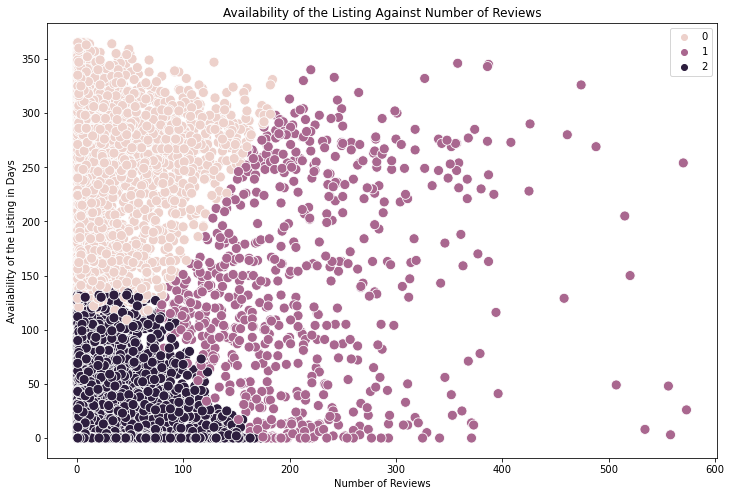

In [22]:
# Plot the clusters for the "availability_365" and "dist_from_center" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['number_of_reviews'], y=df_sub['availability_365'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Reviews') # Label x-axis.
plt.ylabel('Availability of the Listing in Days') # Label y-axis.
plt.title('Availability of the Listing Against Number of Reviews')
plt.show()

From the above graph, it is quite hard to say that that number of reviews in Airbnb is affecting the availability of the listing. However, we can see than listings having review in between 400 to 500 are available for more than 100 days. The maximum Listings have reviews with in 100 and available for less than 100 days. 

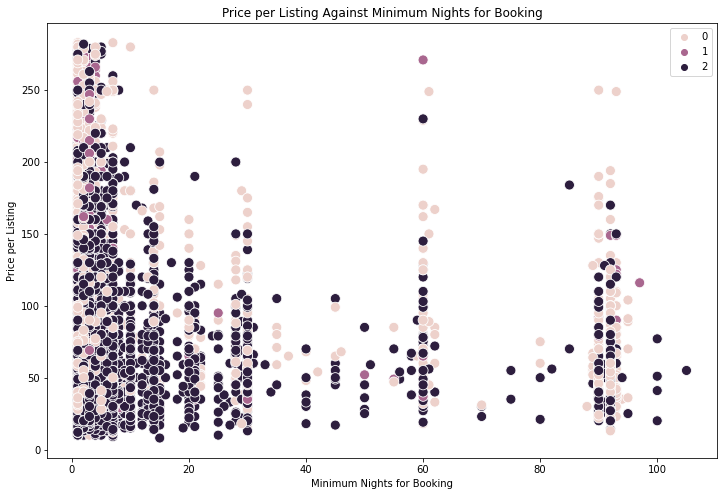

In [23]:
# Plot the clusters for the "price" and "minimum_nights" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['minimum_nights'], y=df_sub['price'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Minimum Nights for Booking') # Label x-axis.
plt.ylabel('Price per Listing') # Label y-axis.
plt.title('Price per Listing Against Minimum Nights for Booking')
plt.show()

The minimum_nights for Booking does not appear to impact the price overall. Generally, the price ranges are also very mixed. We can see in the above graph that there are no expensive Listings for minimum nights between 30 to 60days and 60 to 80 days as well. 
This highlights that in Berlin, there is a broad variety of Listings that require minimum nights stay at a broad range of prices - lower, mid, and upper end regardless of how long you stay. 

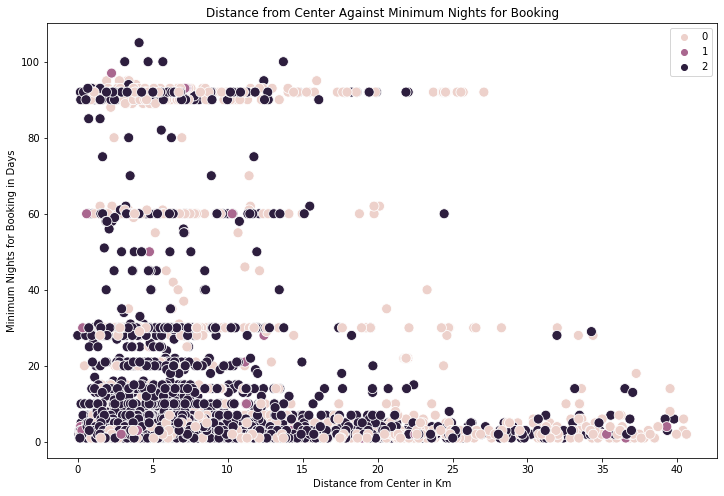

In [24]:
# Plot the clusters for the "price" and "minimum_nights" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['dist_from_center'], y=df_sub['minimum_nights'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Distance from Center in Km') # Label x-axis.
plt.ylabel('Minimum Nights for Booking in Days') # Label y-axis.
plt.title('Distance from Center Against Minimum Nights for Booking')
plt.show()

This chart is also not giving any in depth relationship between distance from the center and minimum nights for booking. However, we can see that maximum listings have minimum nights for booking within 10 days despite of distance from the center. Also, there are no listings with mimimum nights above 30days with in distance of 30 to 40 from center. 

In [27]:
df_sub.loc[df_sub['clusters'] == 2, 'cluster'] = 'dark purple'
df_sub.loc[df_sub['clusters'] == 1, 'cluster'] = 'purple'
df_sub.loc[df_sub['clusters'] == 0, 'cluster'] = 'pink'

In [28]:
df_sub.groupby('cluster').agg({'minimum_nights':['mean', 'median'], 
                         'number_of_reviews':['mean', 'median'],
                        'review_scores_cleanliness': ['mean', 'median'],
                        'availability_365':['mean', 'median'],
                         'dist_from_center':['mean', 'median'],
                          'price':['mean', 'median']})

minimum_nights        number_of_reviews         \
                      mean median              mean median   
cluster                                                      
dark purple       6.075752      3         15.462907      6   
pink             14.219357      3         29.595445     13   
purple            6.254062      2        209.725258    195   

            review_scores_cleanliness        availability_365         \
                                 mean median             mean median   
cluster                                                                
dark purple                  4.632945   4.80        11.256686    0.0   
pink                         4.641942   4.79       250.430676  262.5   
purple                       4.758538   4.81       139.728213  131.0   

            dist_from_center                 price         
                        mean    median        mean median  
cluster                                                    
dark purple         6.099909  5.301329   63.800157     50  
pink                8.841946  6.405004  105.356330     88  
purple              5.624608  4.060232  100.245199     84

### 05. Conclusion from the Clusters:
Based on the above cluster results, purple cluster seems to have the best stats in a variety of categories. The median as well as the mean regarding the number of reviews  and review score on cleanliness are highest this cluster. It also has the shortest distance to the center of Berlin.

Dark purple cluster has the Listings with lower price and the mean and median of  availability of the listings are 
11 and 0. So, we can say listings with lower price are almost fully booked for next 365 days. It also shows that the number of reviews is not affecting the availability of the listing. 